<a href="https://colab.research.google.com/github/Savvy-Slowley/Sales_Predictions-PROJECT-/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [2]:
##Basic##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Pre-Processing##
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# For scaling data
from sklearn.preprocessing import StandardScaler

##Models##
#Import the Decision tree
from sklearn.tree import DecisionTreeRegressor
#Import the Bagging regressor
from sklearn.ensemble import BaggingRegressor
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Make a linear regression model
from sklearn.linear_model import LinearRegression

##Metrics##
#Coefficient of Determination, Mean Squared Error, Mean Absolute Error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Generating The Data

In [3]:
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Rows,Columns
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Checking for duplicates
df.duplicated().any()

False

In [7]:
#Seeing which columns have NaN values and the quantity
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#This is a block of code that makes you see which rows have NAN values
df[df.isnull().any(axis=1)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [9]:
#Running a value count for Outlet Size because it has missing values that needs to be imputed
# I want to rename the data from high to large
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
#There is a trend between Outlet Size and Outlet Location Type where 'Tier 3'== 'Medium', 'Tier 1' == 'Small' & 'Tier 2' == 'High'
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 3')), 'Medium', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 1')), 'Small', df['Outlet_Size'])  
df['Outlet_Size'] = np.where(((df['Outlet_Location_Type'] == 'Tier 2')), 'Large', df['Outlet_Size'])  
#Identifies the case to apply to
#This is the value that is inserted
#This is the column that is affected

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [12]:
df[df.isnull().any(axis=1)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


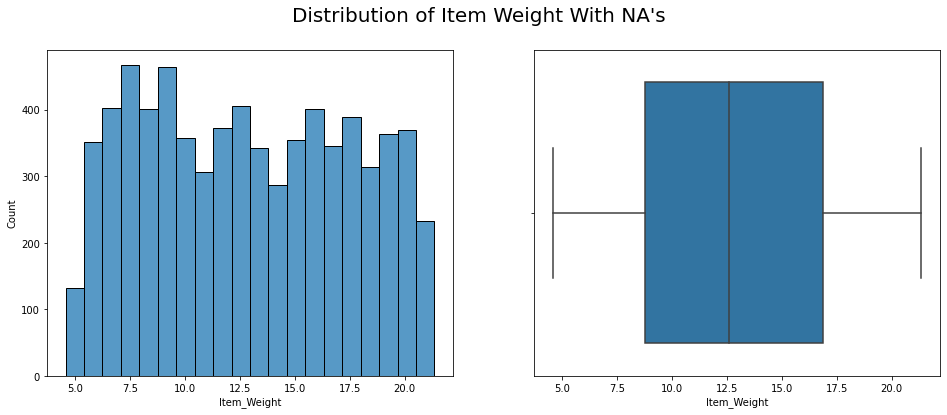

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Distribution of Item Weight With NA's", fontsize= 20);
sns.histplot(ax=axes[0], data=df, x="Item_Weight");
sns.boxplot(ax=axes[1], data=df, x='Item_Weight');

Because the distribution in this graph is even I will use the mean fill to put all the NaN values 

In [14]:
df['Item_Weight'].fillna(int(df['Item_Weight'].mean()), inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Quickly checked all the value counts for each column to see if there is any data imputed incorrectly

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF & low fat is suppose to be Low Fat and reg is suppose to be Regular

In [17]:
df = df.replace(['LF', 'low fat'], 'Low Fat')
df = df.replace(['reg'], 'Regular')

In [18]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.066132,140.992782,1997.831867,2181.288914
std,4.238481,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis (EDA)

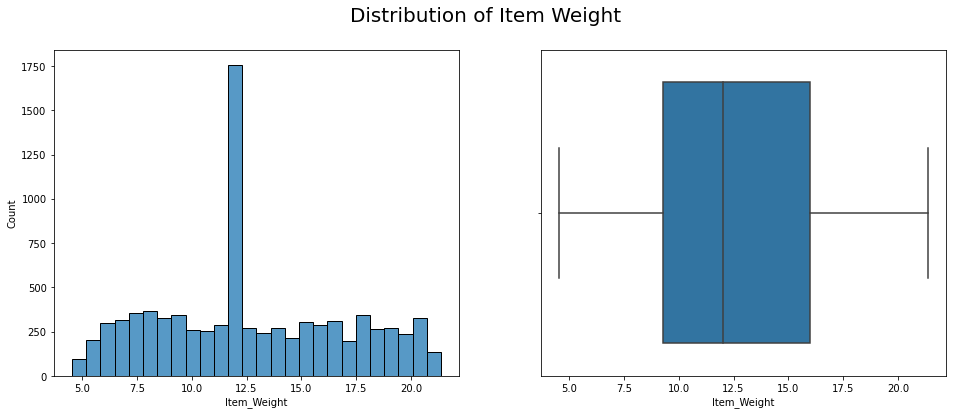

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Item Weight', fontsize= 20);
sns.histplot(ax=axes[0], data=df, x="Item_Weight");
sns.boxplot(ax=axes[1], data=df, x='Item_Weight');

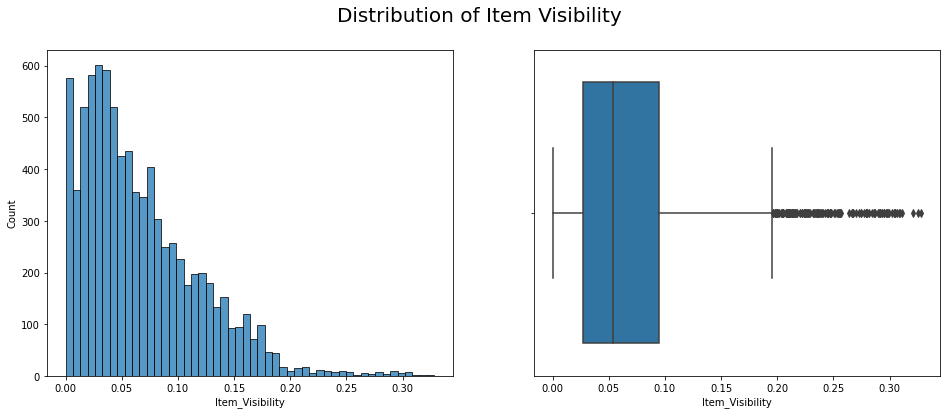

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Item Visibility', fontsize= 20);
sns.histplot(ax=axes[0], data=df, x="Item_Visibility");
sns.boxplot(ax=axes[1], data=df, x='Item_Visibility');

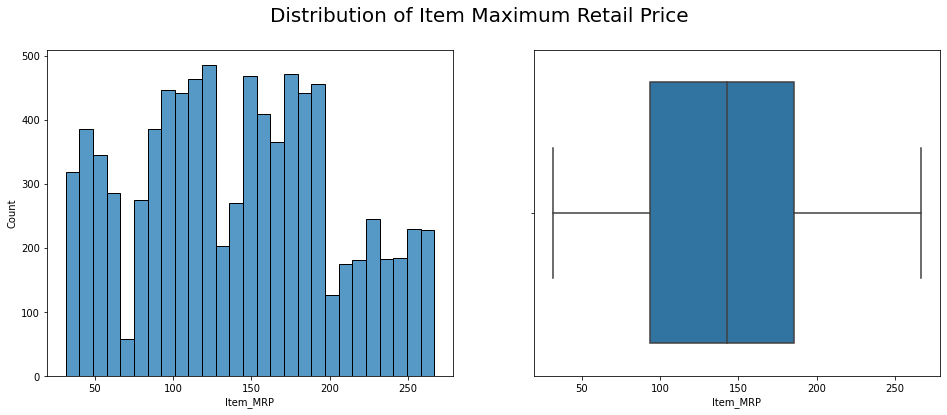

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Item Maximum Retail Price', fontsize= 20);
sns.histplot(ax=axes[0], data=df, x="Item_MRP");
sns.boxplot(ax=axes[1], data=df, x='Item_MRP');

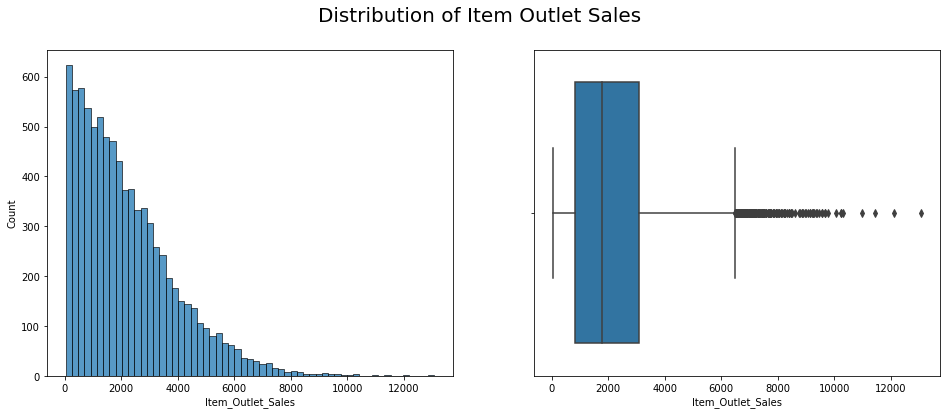

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Item Outlet Sales', fontsize= 20);
sns.histplot(ax=axes[0], data=df, x="Item_Outlet_Sales");
sns.boxplot(ax=axes[1], data=df, x='Item_Outlet_Sales');

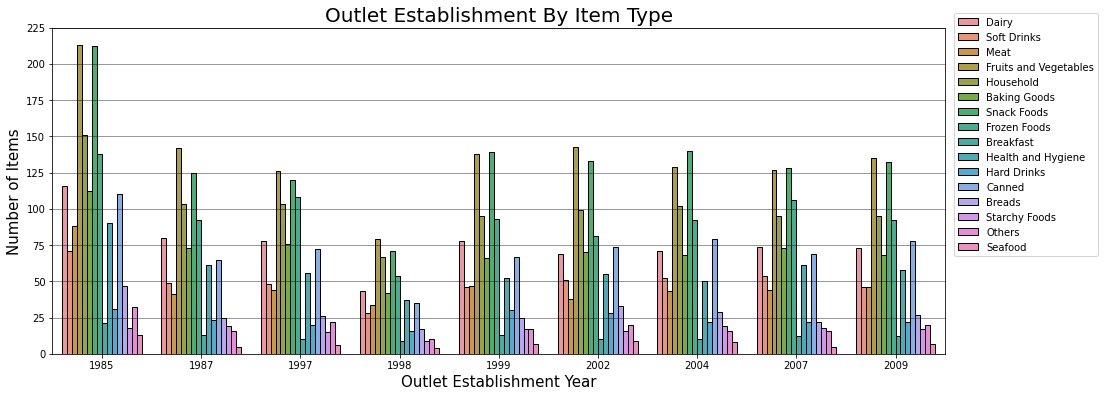

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x='Outlet_Establishment_Year',hue='Item_Type', edgecolor='k' ,data=df);
plt.legend(loc= (1.01, .3))
plt.title('Outlet Establishment By Item Type', fontsize = 20);
plt.xlabel('Outlet Establishment Year', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=225); 
plt.grid(axis='y', color='k', alpha=.5) 

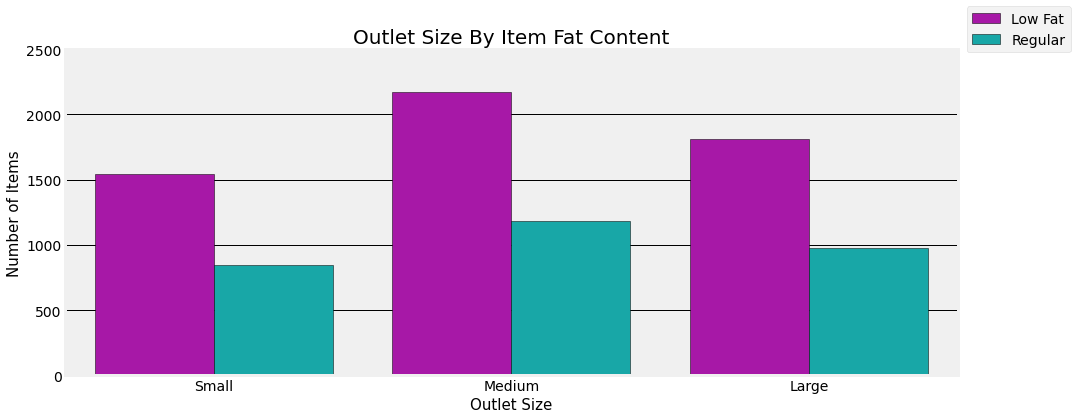

In [25]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight');
sns.countplot(x='Outlet_Size',hue='Item_Fat_Content',edgecolor='k' ,data=df, palette=["m", "c"]);
plt.legend(loc= (1.01, .99))
plt.title('Outlet Size By Item Fat Content', fontsize = 20);
plt.xlabel('Outlet Size', fontsize = 15);
plt.ylabel('Number of Items', fontsize = 15);
plt.ylim(bottom=0, top=2500);  
plt.grid(axis='y', color='k')

# Data Pre-Processing

In [26]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [27]:
df.select_dtypes(include='object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [28]:
objects = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

In [29]:
# Instantiate Label Encoder
le = LabelEncoder()
# Fit and transform categorical data
df[objects] = df[objects].apply(le.fit_transform)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,2,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,2,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,1,2,1,994.7052


In [30]:
corr = df.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.020897,-0.019059,0.028033,0.025351,0.044968,-0.007093,-0.002990,-0.031796,0.005361
Item_Fat_Content,-0.020897,1.000000,0.047314,-0.139434,0.006063,0.003151,0.003795,-0.001598,0.002199,0.018719
Item_Visibility,-0.019059,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.076912,-0.028099,-0.173468,-0.128625
Item_Type,0.028033,-0.139434,-0.035249,1.000000,0.032651,0.004970,-0.008100,0.003084,0.003053,0.017048
Item_MRP,0.025351,0.006063,-0.001315,0.032651,1.000000,0.005020,-0.001887,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.044968,0.003151,-0.074834,0.004970,0.005020,1.000000,-0.442650,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007093,0.003795,0.076912,-0.008100,-0.001887,-0.442650,1.000000,-0.434993,-0.084891,-0.099404
Outlet_Location_Type,-0.002990,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.434993,1.000000,0.467219,0.089367
Outlet_Type,-0.031796,0.002199,-0.173468,0.003053,-0.001975,-0.122304,-0.084891,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.005361,0.018719,-0.128625,0.017048,0.567574,-0.049135,-0.099404,0.089367,0.401522,1.000000


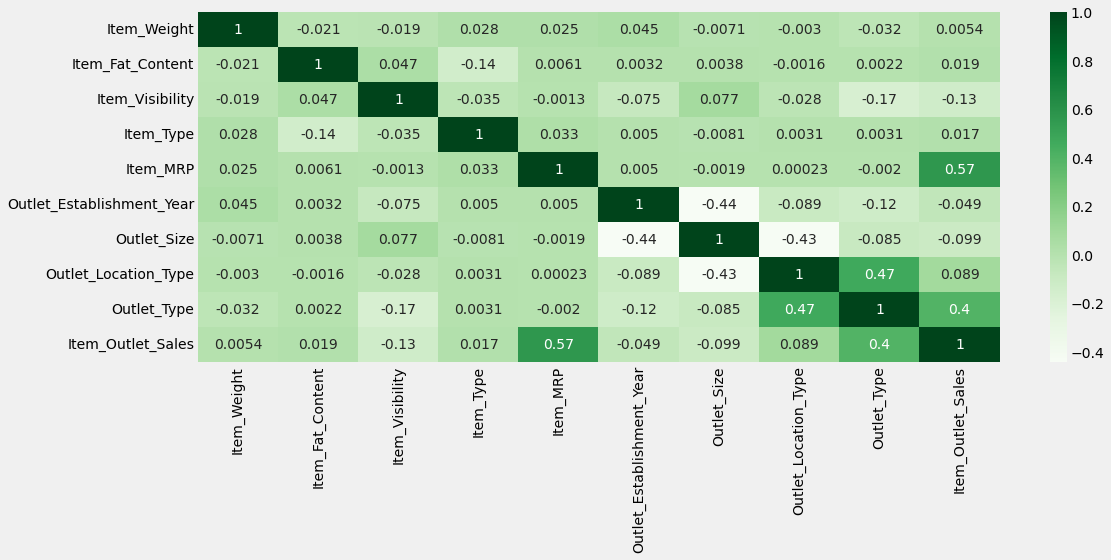

In [31]:
plt.figure(figsize=(16,6))
sns.heatmap(corr, cmap='Greens', annot=True);

In [32]:
# Assigning the "Item_Outlet_Sales" as the target
y = df['Item_Outlet_Sales']
X = np.array(df.drop(columns = ['Item_Outlet_Sales']))

In [33]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X_train)
# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Checking target (Rows,Columns)
y.shape

(8523,)

In [36]:
#Checking features (Rows,Columns)
X.shape

(8523, 9)

In [37]:
#Making sure 75% of the data is in the training 
print('X training:', len(X_train))
print('y training:', len(y_train))

X training: 6392
y training: 6392


In [38]:
#Making sure 25% of the data is in the testing pile
print('X testing:', len(X_test))
print('y testing:', len(y_test))

X testing: 2131
y testing: 2131


# Building the Models

## Baseline Scores

In [39]:
#Baseline Coefficient of Determination Training(R^2)
print('Baseline Coefficient of Determination Training(R^2):', r2_score(y_train, [y_train.mean()]*len(y_train)))
#Baseline Coefficient of Determination Testing(R^2)
print('Baseline Coefficient of Determination Testing(R^2):', r2_score(y_test, [y_train.mean()]*len(y_test)))

Baseline Coefficient of Determination Training(R^2): 0.0
Baseline Coefficient of Determination Testing(R^2): -0.004772483978720654


In [40]:
#Baseline Root Mean Squared Error Training(RMSE)
print('Baseline Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, [y_train.mean()]*len(y_train))))
#Baseline Root Mean Squared Error Testing(RMSE)
print('Baseline Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, [y_train.mean()]*len(y_test))))

Baseline Root Mean Squared Error Training: 1720.306863477141
Baseline Root Mean Squared Error Testing: 1664.9758144520795


## Linear Regression

In [41]:
# Make a linear regression instance
reg = LinearRegression()
#Model is learning the relationship between X and y
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#Compare our test and train score to make sure our model make good predictons and doesn't overfit(R^2)
reg_test_score = reg.score(X_test, y_test)
print('Linear Regression Test Score/Coefficient of Determination(R^2):', reg_test_score)
reg_train_score = reg.score(X_train, y_train)
print('Linear Regression Train Score/Coefficient of Determination(R^2):',reg_train_score)

Linear Regression Test Score/Coefficient of Determination(R^2): 0.528765039642368
Linear Regression Train Score/Coefficient of Determination(R^2): 0.5209556062269973


In [43]:
#Mean Absolute Error Training(MAE)
print('Linear Regression Mean Absolute Error Training:', mean_absolute_error(y_train, reg.predict(X_train)))
#Mean Absolute Error Test(MAE)
print('Linear Regression Mean Absolute Error Test:', mean_absolute_error(y_test, reg.predict(X_test)))

Linear Regression Mean Absolute Error Training: 890.5281463087556
Linear Regression Mean Absolute Error Test: 849.2979627125636


In [44]:
#Mean Squared Error Training(MSE)
print('Linear Regression Mean Squared Error Training:', mean_squared_error(y_train, reg.predict(X_train)))
#Mean Squared Error Testing(MSE)
print('Linear Regression Mean Squared Error Testing:', mean_squared_error(y_test, reg.predict(X_test)))

Linear Regression Mean Squared Error Training: 1417710.6638729796
Linear Regression Mean Squared Error Testing: 1300126.5528471756


In [45]:
#Root Mean Squared Error Training(RMSE)
print('Linear Regression Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
#Root Mean Squared Error Testing(RMSE)
print('Linear Regression Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Linear Regression Root Mean Squared Error Training: 1190.6765572030802
Linear Regression Root Mean Squared Error Testing: 1140.2309208433069


In [46]:
#Slope Coefficient (Coefficient of the features) and the y-intercept
print('Slope Coefficients:', reg.coef_)
print('y-intercept:', reg.intercept_)

Slope Coefficients: [   8.60604283   38.66851426  -85.61896068   -2.42501027  984.26396351
 -191.53865601 -343.39010755 -382.38914929  804.71122928]
y-intercept: 2209.979357196489


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [48]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 8.60604
Feature: 1, Score: 38.66851
Feature: 2, Score: -85.61896
Feature: 3, Score: -2.42501
Feature: 4, Score: 984.26396
Feature: 5, Score: -191.53866
Feature: 6, Score: -343.39011
Feature: 7, Score: -382.38915
Feature: 8, Score: 804.71123


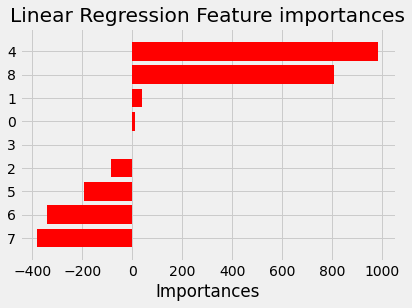

In [49]:
importances = reg.coef_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Linear Regression Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importances')
plt.show()

## Decision Tree

In [86]:
# Make a Decision Tree instance
dec_tree = DecisionTreeRegressor(random_state = 42)
#Model is learning the relationship between X and y
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [53]:
#The depth of the decision tree
dec_tree.get_depth()

33

In [54]:
#Check leaf nodes
dec_tree.get_n_leaves()

6234

In [55]:
#Evaluate the model by seeing it's R^2
dec_tree_train_score = dec_tree.score(X_train, y_train)
dec_tree_test_score = dec_tree.score(X_test, y_test)
print('Decision Tree Train Score(Original):', dec_tree_train_score)
print('Decision Tree Test Score(Original):',dec_tree_test_score)

Decision Tree Train Score(Original): 1.0
Decision Tree Test Score(Original): 0.1495773317121969


In [56]:
#Looking at options for tuning this model
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [57]:
# List of values to try for max_depth:
dec_tree_max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# List to store the score for each value of max_depth:
r2 = []
for depth in dec_tree_max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

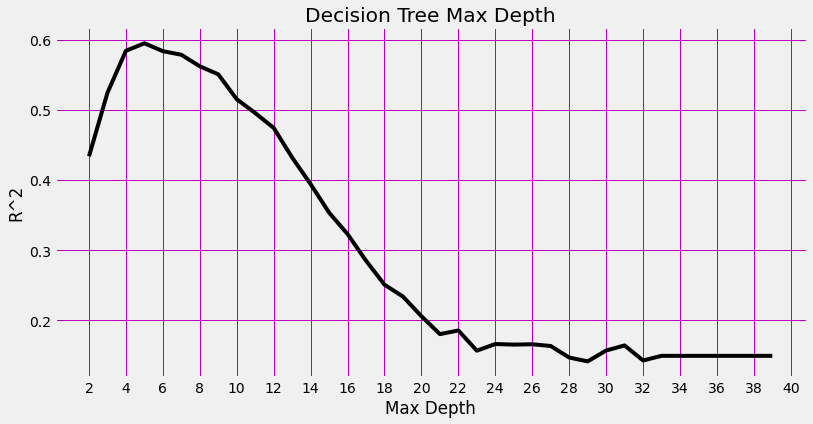

In [58]:
# Visualize which max_depth leads to the highest R^2 score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6));
plt.plot(dec_tree_max_depth_range, r2, c='k');
plt.xlabel('Max Depth');
plt.ylabel('R^2');
plt.grid(c='m');
plt.locator_params(axis="x", nbins=40);
plt.title('Decision Tree Max Depth');

In [88]:
#Let's run the model with our optimized value for max_depth
dec_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree.fit(X_train, y_train)
dec_tree_train_score = dec_tree.score(X_train, y_train)
dec_tree_test_score = dec_tree.score(X_test, y_test)
print('Decision Tree Train Score/Coefficient of Determination(R^2):', dec_tree_train_score)
print('Decision Tree Test Score/Coefficient of Determination(R^2):',dec_tree_test_score)

Decision Tree Train Score/Coefficient of Determination(R^2): 0.6039333642950268
Decision Tree Test Score/Coefficient of Determination(R^2): 0.5947002841975135


In [89]:
#Mean Absolute Error Training(MAE)
print('Decision Tree Mean Absolute Error Training:', mean_absolute_error(y_train, dec_tree.predict(X_train)))
#Mean Absolute Error Test(MAE)
print('Decision Tree Mean Absolute Error Test:', mean_absolute_error(y_test, dec_tree.predict(X_test)))

Linear Regression Mean Absolute Error Training: 762.6547411187717
Linear Regression Mean Absolute Error Test: 738.4705182782624


In [ ]:
#Mean Squared Error Training(MSE)
print('Decision Tree Mean Squared Error Training:', mean_squared_error(y_train, dec_tree.predict(X_train)))
#Mean Squared Error Testing(MSE)
print('Decision Tree Mean Squared Error Testing:', mean_squared_error(y_test, dec_tree.predict(X_test)))

In [90]:
#Root Mean Squared Error Training(RMSE)
print('Decision Tree Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
#Root Mean Squared Error Testing(RMSE)
print('Decision Tree Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))

Linear Regression Root Mean Squared Error Training: 1082.6549147395608
Linear Regression Root Mean Squared Error Testing: 1057.455772433794


In [61]:
dec_importance = dec_tree_5.feature_importances_
for i,v in enumerate(dec_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00087
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.55238
Feature: 5, Score: 0.02599
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.42062


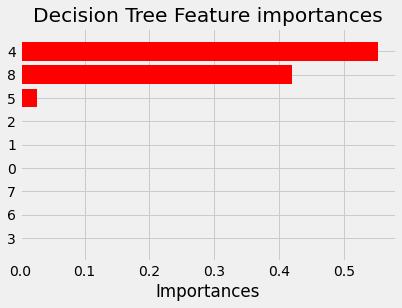

In [62]:
importances = dec_tree_5.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Decision Tree Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importances')
plt.show()

## Bagged Tree

In [91]:
# Make a Bagged Tree instance
bagreg = BaggingRegressor(random_state = 42)
#Model is learning the relationship between X and y
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [69]:
#Evaluate the model by seeing it's R^2
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('Bagged Tree Train Score:',bagreg_train_score)
print('Bagged Tree Test Score:',bagreg_test_score)

Bagged Tree Train Score: 0.9189852384558321
Bagged Tree Test Score: 0.5100311033808562


## Random Forests

In [71]:
# Make a Random Forests instance
rf = RandomForestRegressor(random_state = 42)
#Model is learning the relationship between X and y
rf.fit(X_train, y_train)

In [75]:
#Evaluate the model by seeing it's R^2
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random Forests Train Score(Original):',rf_train_score)
print('Random Forests Test Score(Original):',rf_test_score)

Random Forests Train Score(Original): 0.9374079970221483
Random Forests Test Score(Original): 0.5490651989003774


In [76]:
# List of values to try for max_depth:
rf_max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# List to store the score for each value of max_depth:
r2 = []
for rf_depth in rf_max_depth_range:
    rf = RandomForestRegressor(max_depth = rf_depth, random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

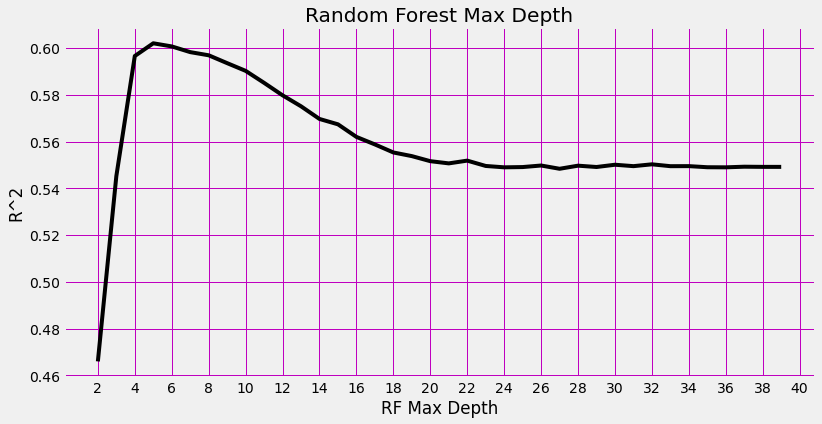

In [77]:
# Visualize which max_depth leads to the highest R^2 score
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
plt.plot(rf_max_depth_range, r2, c='k');
plt.xlabel('RF Max Depth');
plt.ylabel('R^2');
plt.grid(c='m');
plt.locator_params(axis="x", nbins=40);
plt.title('Random Forest Max Depth');

In [78]:
#Let's run the model with our optimized value for max_depth
rf = RandomForestRegressor(max_depth = 5, random_state = 42)
rf.fit(X_train, y_train)
rf_train_score = rf_5.score(X_train, y_train)
rf_test_score = rf_5.score(X_test, y_test)
print('Random Forests Train Score/Coefficient of Determination(R^2):',rf_train_score)
print('Random Forests Test Score/Coefficient of Determination(R^2):',rf_test_score)

Random Forests Train Score(Optimized): 0.6104462786876537
Random Forests Test Score(Optimized): 0.6020737470962458


In [ ]:
#Mean Absolute Error Training(MAE)
print('Random Forests Mean Absolute Error Training:', mean_absolute_error(y_train, rf.predict(X_train)))
#Mean Absolute Error Test(MAE)
print('Random Forests Mean Absolute Error Test:', mean_absolute_error(y_test, rf.predict(X_test)))

In [ ]:
#Mean Squared Error Training(MSE)
print('Random Forests Mean Squared Error Training:', mean_squared_error(y_train, rf.predict(X_train)))
#Mean Squared Error Testing(MSE)
print('Random Forests Mean Squared Error Testing:', mean_squared_error(y_test, rf.predict(X_test)))

In [ ]:
#Root Mean Squared Error Training(RMSE)
print('Random Forests Root Mean Squared Error Training:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
#Root Mean Squared Error Testing(RMSE)
print('Random Forests Root Mean Squared Error Testing:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

In [80]:
rf_5_importance = rf_5.feature_importances_
for i,v in enumerate(rf_5_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00026
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00199
Feature: 3, Score: 0.00042
Feature: 4, Score: 0.55454
Feature: 5, Score: 0.03067
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.41206


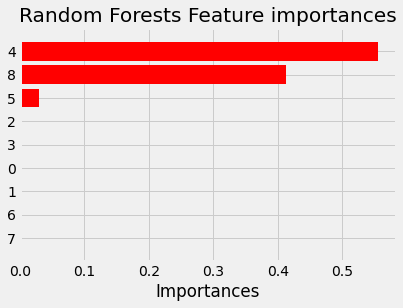

In [81]:
importances = rf_5.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Random Forests Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r",  align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importances')
plt.show()

# Results

In [84]:
print('Linear Regression Coefficient of Determination Training(R^2):',reg_train_score)
print('Linear Regression Coefficient of Determination Training(R^2):', reg_test_score)
print('')
print('Decision Tree Coefficient of Determination Training(R^2):', dec_tree_train_score)
print('Decision Tree Coefficient of Determination Training(R^2):',dec_tree_test_score)
print('')
print('Bagged Tree Coefficient of Determination Training(R^2):',bagreg_train_score)
print('Bagged Tree Coefficient of Determination Training(R^2):',bagreg_test_score)
print('')
print('Random Forests Coefficient of Determination Training(R^2):',rf_train_score)
print('Random Forests Coefficient of Determination Training(R^2):',rf_test_score)

Linear Regression Coefficient of Determination Training(R^2): 0.5209556062269973
Linear Regression Coefficient of Determination Training(R^2): 0.528765039642368

Decision Tree Coefficient of Determination Training(R^2): 0.6039333642950268
Decision Tree Coefficient of Determination Training(R^2): 0.5947002841975135

Bagged Tree Coefficient of Determination Training(R^2): 0.9189852384558321
Bagged Tree Coefficient of Determination Training(R^2): 0.5100311033808562

Random Forests Coefficient of Determination Training(R^2): 0.6104462786876537
Random Forests Coefficient of Determination Training(R^2): 0.6020737470962458


In [85]:
print('Linear Regression Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Linear Regression Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print('')
print('Decision Tree Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
print('Decision Tree Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))
print('')
print('Bagged Tree Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('Bagged Tree Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))
print('')
print('Random Forests Root Mean Squared Error Training(RMSE):', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print('Random Forests Root Mean Squared Error Testing(RMSE):', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Linear Regression Root Mean Squared Error Training(RMSE): 1190.6765572030802
Linear Regression Root Mean Squared Error Testing(RMSE): 1140.2309208433069

Decision Tree Root Mean Squared Error Training(RMSE): 1082.6549147395608
Decision Tree Root Mean Squared Error Testing(RMSE): 1057.455772433794

Bagged Tree Root Mean Squared Error Training(RMSE): 489.65252802650434
Bagged Tree Root Mean Squared Error Testing(RMSE): 1162.6749578037295

Random Forests Root Mean Squared Error Training(RMSE): 1073.7164349852212
Random Forests Root Mean Squared Error Testing(RMSE): 1047.7926770041222
